In [1]:
nazwa = "solK2Legit3.npz"
frames = 2500

# Dysypatywność

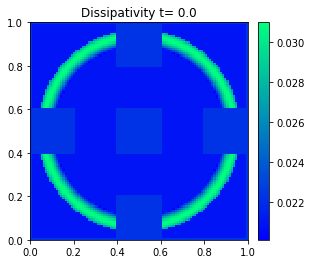

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=2*1800)

fig = plt.figure()
ax = fig.add_subplot(111)

# I like to position my colorbars this way, but you don't have to
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')

# This is now a list of arrays rather than a list of artists
solution = np.load(nazwa)
siatka = np.load("siatka.npz" )
INNER  = siatka['INNER']
X  = siatka['X']
Y  = siatka['Y']

OMEGA = solution['OMEGA']
times = solution['TIMES']

#frames = times.size
#frames = 500

cv0 = OMEGA[:,:,0]
im = ax.imshow(cv0, cmap='winter', origin='upper', extent=[0, 1, 0, 1]) # Here make an AxesImage rather than contour
cb = fig.colorbar(im, cax=cax)
tx = ax.set_title('Dissipativity t= 0')

N = int(np.sqrt(INNER.size))

def animate(i):
    arr = OMEGA[:,:,i]
    
    # Poprawka
    ile = 0 
    suma = 0
    for ix in range(X.size):
        for iy in range(Y.size):
            if INNER[iy,ix] == 1:
                suma += arr[iy,ix]
                ile  += 1
    srednia = suma/ile

    for ix in range(X.size):
        for iy in range(Y.size):
            if INNER[iy,ix] == 0 or INNER[iy,ix] == 2:
                arr[iy,ix] = srednia
    
    vmax     = np.max(arr)
    vmin     = np.min(arr)
    im.set_data(arr)
    im.set_clim(vmin, vmax)
    tx.set_text('Dissipativity t= {0}'.format(round(times[i],4)))

ani = animation.FuncAnimation(fig, animate, frames=frames, interval=200)

plt.show()

ani.save('Dissipativity.mp4', writer=writer)

# Energia kinetyczna turbulencji

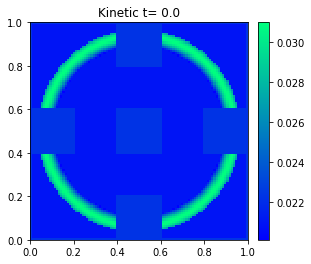

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=2*1800)

fig = plt.figure()
ax = fig.add_subplot(111)

# I like to position my colorbars this way, but you don't have to
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')

# This is now a list of arrays rather than a list of artists
solution = np.load(nazwa)
siatka = np.load("siatka.npz" )
INNER  = siatka['INNER']
X  = siatka['X']
Y  = siatka['Y']

B = solution['B']
times = solution['TIMES']

#frames = times.size
#frames = 600

cv0 = B[:,:,0]
im = ax.imshow(cv0, cmap='winter', origin='upper', extent=[0, 1, 0, 1]) # Here make an AxesImage rather than contour
cb = fig.colorbar(im, cax=cax)
tx = ax.set_title('Kinetic t= 0')

N = int(np.sqrt(INNER.size))

def animate(i):
    arr = B[:,:,i]
    
    # Poprawka
    ile = 0 
    suma = 0
    for ix in range(X.size):
        for iy in range(Y.size):
            if INNER[iy,ix] == 1:
                suma += arr[iy,ix]
                ile  += 1
    srednia = suma/ile

    for ix in range(X.size):
        for iy in range(Y.size):
            if INNER[iy,ix] == 0 or INNER[iy,ix] == 2:
                arr[iy,ix] = srednia
    
    vmax     = np.max(arr)
    vmin     = np.min(arr)
    im.set_data(arr)
    im.set_clim(vmin, vmax)
    tx.set_text('Kinetic t= {0}'.format(round(times[i],4)))

ani = animation.FuncAnimation(fig, animate, frames=frames, interval=200)

plt.show()

ani.save('Kinetic.mp4', writer=writer)

# Cisnienie

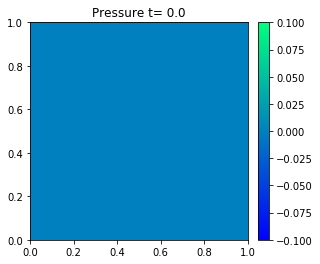

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=2*1800)

fig = plt.figure()
ax = fig.add_subplot(111)

# I like to position my colorbars this way, but you don't have to
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')

# This is now a list of arrays rather than a list of artists
solution = np.load(nazwa)
siatka = np.load("siatka.npz" )
INNER  = siatka['INNER']
X  = siatka['X']
Y  = siatka['Y']

P = solution['P']
times = solution['TIMES']

#frames = times.size
#frames = 100

cv0 = P[:,:,0]
im = ax.imshow(cv0, cmap='winter', origin='upper', extent=[0, 1, 0, 1]) # Here make an AxesImage rather than contour
cb = fig.colorbar(im, cax=cax)
tx = ax.set_title('Pressure t= 0')

N = int(np.sqrt(INNER.size))

def animate(i):
    arr = P[:,:,i]
    
    # Poprawka
    ile = 0 
    suma = 0
    for ix in range(X.size):
        for iy in range(Y.size):
            if INNER[iy,ix] == 1:
                suma += arr[iy,ix]
                ile  += 1
    srednia = suma/ile

    for ix in range(X.size):
        for iy in range(Y.size):
            if INNER[iy,ix] == 0 or INNER[iy,ix] == 2:
                arr[iy,ix] = srednia
    
    vmax     = np.max(arr)
    vmin     = np.min(arr)
    im.set_data(arr)
    im.set_clim(vmin, vmax)
    tx.set_text('Pressure t= {0}'.format(round(times[i],4)))

ani = animation.FuncAnimation(fig, animate, frames=frames, interval=200)

plt.show()

ani.save('Pressure.mp4', writer=writer)

# Predkosc

0.25


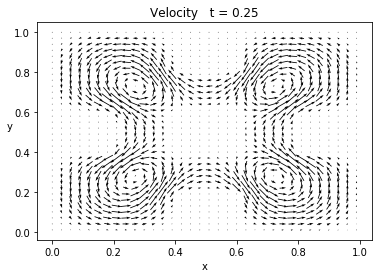

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

np.seterr(divide='ignore', invalid='ignore')

solution = np.load(nazwa)
siatka = np.load("siatka.npz" )
INNER  = siatka['INNER']
X  = siatka['X']
Y  = siatka['Y']

U = solution['U']
V = solution['V']
times = solution['TIMES']

# quiver
X, Y = np.meshgrid(X, Y)

# ktora klatka
i = frames
#i = 120
print(round(times[i],4))

k = 3

plt.figure()
plt.title('Velocity   t = ' + str(round(times[i],3)))
plt.xlabel('x')
plt.ylabel('y',rotation=0)
plt.quiver(X[::k, ::k], Y[::k, ::k], V[::k, ::k, i], U[::k, ::k, i],pivot='mid', units='inches')

plt.subplots_adjust(hspace = 0.5,wspace = 0.05)

plt.savefig('velocityK2D.pdf')
plt.show()

In [6]:
V[30,50,300]

-0.01397169963387431